In [2]:
"""
Madrid Bus Real-Time Simulator API - Ejemplos de uso y visualización
Código sencillo para probar endpoints REST y WebSocket con matplotlib
"""

import requests
import json
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import defaultdict
import websocket
import threading

In [3]:
# ============================================================================
# CONFIGURACIÓN
# ============================================================================

API_KEY = "JTqm0XnZJ29IGprwAfGKviKLwkbIlry0"
GROUP_NAME = "mdepaz"
BASE_URL = "https://0w08yrrx1a.execute-api.eu-west-1.amazonaws.com/prod"
WS_URL = "wss://h2pcljio20.execute-api.eu-west-1.amazonaws.com/production"

HEADERS = {
    "x-api-key": API_KEY,
    "x-group-name": GROUP_NAME
}

In [11]:


# IDs reales de lines.yaml - Línea L1
STOP_IDS = ["S001", "S002", "S003", "S004", "S005", "S006", "S007"]

print("=" * 80)
print("EJEMPLO 1: People Count - Rango de fechas")
print("=" * 80)

# Probar con la primera parada de L1
stop_id = "S003"  # Plaza de Castilla

# Rango de fechas: Domingo 22 Feb a Miércoles 25 Feb 2026
start_date = datetime(2026, 2, 22, 22, 0, 0)  # Domingo 8:00
end_date = datetime(2026, 2, 25, 20, 0, 0)   # Miércoles 20:00

timestamps = []
counts = []

print(f"\nConsultando parada {stop_id} cada 3 horas...")

current = start_date
while current <= end_date:
    timestamp_str = current.strftime("%Y-%m-%dT%H:%M:%SZ")
    url = f"{BASE_URL}/people-count/{stop_id}?timestamp={timestamp_str}"
    
    try:
        response = requests.get(url, headers=HEADERS)
        if response.status_code == 200:
            data = response.json()
            # Parsear el timestamp sin microsegundos
            time_str = data['time'].replace('Z', '').split('.')[0]
            timestamps.append(datetime.fromisoformat(time_str))
            counts.append(data['count'])
            print(f"✓ {data['time']}: {data['count']} personas")
        else:
            print(f"✗ Error {response.status_code}: {response.text}")
    except Exception as e:
        print(f"✗ Error: {e}")
    
    current += timedelta(hours=1)

# Visualizar
if timestamps and counts:
    plt.figure(figsize=(14, 6))
    plt.plot(timestamps, counts, marker='o', linestyle='-', linewidth=2, markersize=8, color='steelblue')
    plt.xlabel('Fecha y Hora', fontsize=12)
    plt.ylabel('Número de Personas', fontsize=12)
    plt.title(f'People Count en Parada {stop_id} - Plaza de Castilla\n(22-25 Feb 2026)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('dataviz/example_001_people_count.png', dpi=150)
    print(f"\n✓ Gráfico guardado: dataviz/example_001_people_count.png")
    print(f"✓ Total de datos: {len(timestamps)} puntos")
    plt.close()
else:
    print("\n✗ No se obtuvieron datos para visualizar")

# Probar también con mode=latest
print(f"\n\nProbando consulta con mode=latest...")
url = f"{BASE_URL}/people-count/{stop_id}?mode=latest"
try:
    response = requests.get(url, headers=HEADERS)
    if response.status_code == 200:
        data = response.json()
        print(f"✓ Datos más recientes:")
        print(f"  Stop: {data['stop_id']}")
        print(f"  Time: {data['time']}")
        print(f"  Count: {data['count']} personas")
        print(f"  Lines: {data['line_ids']}")
    else:
        print(f"✗ Error {response.status_code}: {response.text}")
except Exception as e:
    print(f"✗ Error: {e}")

print("\n" + "=" * 80)


EJEMPLO 1: People Count - Rango de fechas

Consultando parada S003 cada 3 horas...
✗ Error 404: {"error": true, "message": "No data found for stop S003", "timestamp": "2026-02-25T21:25:47.494112+00:00"}
✓ 2026-02-22 22:59:18.555000000: 0 personas
✓ 2026-02-22 23:59:18.562000000: 0 personas
✓ 2026-02-23 00:59:18.569000000: 0 personas
✓ 2026-02-23 01:59:18.576000000: 0 personas
✓ 2026-02-23 02:59:18.583000000: 0 personas
✓ 2026-02-23 03:59:18.589000000: 0 personas
✓ 2026-02-23 04:59:18.596000000: 0 personas
✓ 2026-02-23 05:59:18.603000000: 0 personas
✓ 2026-02-23 06:59:18.614000000: 0 personas
✓ 2026-02-23 07:59:18.617000000: 0 personas
✓ 2026-02-23 08:59:18.625000000: 0 personas
✓ 2026-02-23 09:59:18.633000000: 0 personas
✓ 2026-02-23 10:59:18.640000000: 0 personas
✓ 2026-02-23 11:59:18.648000000: 0 personas
✓ 2026-02-23 12:59:18.655000000: 0 personas
✓ 2026-02-23 13:59:18.663000000: 0 personas
✓ 2026-02-23 14:59:18.670000000: 0 personas
✓ 2026-02-23 15:59:18.677000000: 0 personas
✓ 202

KeyboardInterrupt: 

EJEMPLO 2: Sensores de Buses - Datos actuales
✓ B001: Temp=19.201925621011156°C, Humidity=80.69575072158487%, CO2=355ppm, Door=closed
✓ B002: Temp=22.291397195028093°C, Humidity=68.69245211095388%, CO2=423ppm, Door=closed
✓ B003: Temp=18.83613101059282°C, Humidity=61.176043990128484%, CO2=446ppm, Door=closed


FileNotFoundError: [Errno 2] No such file or directory: 'dataviz/bus_sensors_comparison.png'

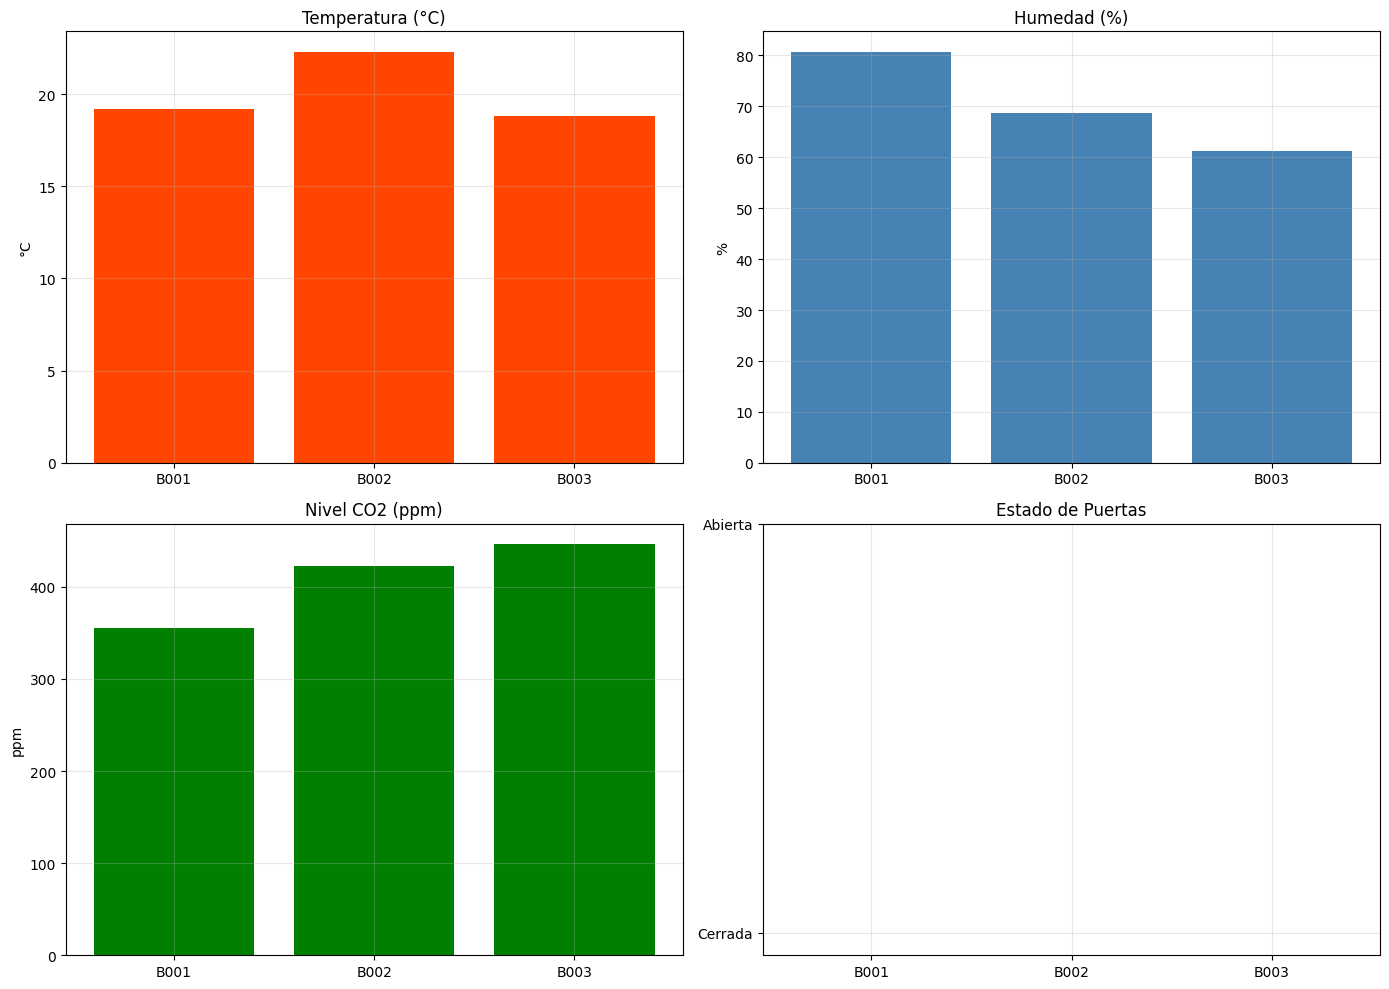

In [12]:
# ============================================================================
# EJEMPLO 2: Consultar sensores de múltiples buses
# ============================================================================

print("=" * 80)
print("EJEMPLO 2: Sensores de Buses - Datos actuales")
print("=" * 80)

bus_ids = ["B001", "B002", "B003"]
bus_data = {}

for bus_id in bus_ids:
    url = f"{BASE_URL}/sensors/bus/{bus_id}?mode=latest"
    
    try:
        response = requests.get(url, headers=HEADERS)
        if response.status_code == 200:
            data = response.json()
            bus_data[bus_id] = data
            print(f"✓ {bus_id}: Temp={data['temperature']}°C, Humidity={data['humidity']}%, CO2={data['co2_level']}ppm, Door={data['door_status']}")
        else:
            print(f"✗ Error {response.status_code} para {bus_id}")
    except Exception as e:
        print(f"✗ Error en {bus_id}: {e}")

# Visualizar comparación de sensores
if bus_data:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    buses = list(bus_data.keys())
    temps = [bus_data[b]['temperature'] for b in buses]
    humidities = [bus_data[b]['humidity'] for b in buses]
    co2_levels = [bus_data[b]['co2_level'] for b in buses]
    
    axes[0, 0].bar(buses, temps, color='orangered')
    axes[0, 0].set_title('Temperatura (°C)')
    axes[0, 0].set_ylabel('°C')
    axes[0, 0].grid(True, alpha=0.3)
    
    axes[0, 1].bar(buses, humidities, color='steelblue')
    axes[0, 1].set_title('Humedad (%)')
    axes[0, 1].set_ylabel('%')
    axes[0, 1].grid(True, alpha=0.3)
    
    axes[1, 0].bar(buses, co2_levels, color='green')
    axes[1, 0].set_title('Nivel CO2 (ppm)')
    axes[1, 0].set_ylabel('ppm')
    axes[1, 0].grid(True, alpha=0.3)
    
    door_statuses = [bus_data[b]['door_status'] for b in buses]
    door_colors = ['red' if d == 'open' else 'gray' for d in door_statuses]
    axes[1, 1].bar(buses, [1 if d == 'open' else 0 for d in door_statuses], color=door_colors)
    axes[1, 1].set_title('Estado de Puertas')
    axes[1, 1].set_yticks([0, 1])
    axes[1, 1].set_yticklabels(['Cerrada', 'Abierta'])
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('dataviz/bus_sensors_comparison.png', dpi=150)
    print(f"\n✓ Gráfico guardado: dataviz/bus_sensors_comparison.png\n")
    plt.close()


In [15]:
# ============================================================================
# EJEMPLO 3: Posiciones de buses en una línea
# ============================================================================

print("=" * 80)
print("EJEMPLO 3: Posiciones de Buses en Línea L1")
print("=" * 80)

line_id = "L3"
url = f"{BASE_URL}/bus-position/line/{line_id}?mode=latest"

try:
    response = requests.get(url, headers=HEADERS)
    if response.status_code == 200:
        data = response.json()
        print(f"✓ Línea {data['line_id']}: {len(data['buses'])} buses activos")
        
        for bus in data['buses']:
            print(f"  - {bus['bus_id']}: ({bus['latitude']:.4f}, {bus['longitude']:.4f}), "
                  f"{bus['passenger_count']} pasajeros, velocidad {bus['speed']} km/h")
        
        # Visualizar en mapa
        plt.figure(figsize=(10, 8))
        for bus in data['buses']:
            plt.scatter(bus['longitude'], bus['latitude'], s=200, alpha=0.6, 
                       label=f"{bus['bus_id']} ({bus['passenger_count']} pax)")
            plt.annotate(bus['bus_id'], (bus['longitude'], bus['latitude']), 
                        textcoords="offset points", xytext=(0,10), ha='center')
        
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.title(f'Posiciones de Buses - Línea {line_id}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig('dataviz/bus_positions_map.png', dpi=150)
        print(f"\n✓ Gráfico guardado: dataviz/bus_positions_map.png\n")
        plt.close()
    else:
        print(f"✗ Error {response.status_code}: {response.text}")
except Exception as e:
    print(f"✗ Error: {e}")


EJEMPLO 3: Posiciones de Buses en Línea L1
✗ Error: 'line_id'


In [ ]:
# ============================================================================
# EJEMPLO 4: Dashboard en tiempo real (polling cada X segundos)
# ============================================================================

print("=" * 80)
print("EJEMPLO 4: Dashboard Tiempo Real - Polling cada 5 segundos (30 seg total)")
print("=" * 80)

bus_id = "B001"
duration = 30  # segundos
interval = 5  # segundos

times_rt = []
speeds_rt = []
passengers_rt = []

start_time = time.time()
iteration = 0

while time.time() - start_time < duration:
    url = f"{BASE_URL}/bus-position/{bus_id}?mode=latest"
    
    try:
        response = requests.get(url, headers=HEADERS)
        if response.status_code == 200:
            data = response.json()
            current_time = datetime.now()
            times_rt.append(current_time)
            speeds_rt.append(data['speed'])
            passengers_rt.append(data['passenger_count'])
            
            print(f"[{iteration}] {current_time.strftime('%H:%M:%S')} - "
                  f"Velocidad: {data['speed']} km/h, Pasajeros: {data['passenger_count']}")
            iteration += 1
    except Exception as e:
        print(f"✗ Error: {e}")
    
    time.sleep(interval)

# Visualizar dashboard
if times_rt and speeds_rt:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    ax1.plot(times_rt, speeds_rt, marker='o', color='blue', linewidth=2)
    ax1.set_ylabel('Velocidad (km/h)', color='blue')
    ax1.set_title(f'Dashboard Tiempo Real - Bus {bus_id}')
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='y', labelcolor='blue')
    
    ax2.plot(times_rt, passengers_rt, marker='s', color='green', linewidth=2)
    ax2.set_xlabel('Tiempo')
    ax2.set_ylabel('Pasajeros', color='green')
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='y', labelcolor='green')
    
    plt.tight_layout()
    plt.savefig('dataviz/realtime_dashboard.png', dpi=150)
    print(f"\n✓ Gráfico guardado: dataviz/realtime_dashboard.png\n")
    plt.close()


In [ ]:
# ============================================================================
# EJEMPLO 5: WebSocket - Recibir eventos en tiempo real
# ============================================================================

print("=" * 80)
print("EJEMPLO 5: WebSocket - Eventos en Tiempo Real")
print("=" * 80)

ws_events = []
ws_running = True

def on_message(ws, message):
    """Callback cuando se recibe un mensaje del WebSocket"""
    try:
        data = json.loads(message)
        timestamp = datetime.now()
        ws_events.append({'time': timestamp, 'data': data})
        
        print(f"[WS] {timestamp.strftime('%H:%M:%S')} - Evento recibido:")
        print(f"     {json.dumps(data, indent=2)}")
        
        # Renderizar evento inmediatamente si es posición de bus
        if 'bus_id' in data and 'latitude' in data:
            plt.figure(figsize=(8, 6))
            plt.scatter(data['longitude'], data['latitude'], s=300, c='red', marker='o', alpha=0.7)
            plt.annotate(f"{data['bus_id']}\n{data['passenger_count']} pax\n{data['speed']} km/h",
                        (data['longitude'], data['latitude']),
                        textcoords="offset points", xytext=(0,15), ha='center', fontsize=10)
            plt.xlabel('Longitud')
            plt.ylabel('Latitud')
            plt.title(f"Posición en Tiempo Real - {data['bus_id']}")
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            filename = f"dataviz/ws_event_{len(ws_events)}.png"
            plt.savefig(filename, dpi=150)
            plt.close()
            print(f"     ✓ Visualización guardada: {filename}")
    except Exception as e:
        print(f"✗ Error procesando mensaje: {e}")

def on_error(ws, error):
    """Callback cuando hay un error"""
    print(f"✗ WebSocket Error: {error}")

def on_close(ws, close_status_code, close_msg):
    """Callback cuando se cierra la conexión"""
    print(f"✓ WebSocket cerrado: {close_status_code} - {close_msg}")

def on_open(ws):
    """Callback cuando se abre la conexión"""
    print("✓ WebSocket conectado")
    
    # Suscribirse a eventos de un bus específico
    subscribe_msg = {
        "action": "subscribe",
        "bus_id": "B001"
    }
    ws.send(json.dumps(subscribe_msg))
    print(f"✓ Suscrito a eventos de B001")

# Crear conexión WebSocket
ws_url_with_params = f"{WS_URL}?api_key={API_KEY}&group_name={GROUP_NAME}"

print(f"\nConectando a WebSocket...")
print(f"URL: {ws_url_with_params}")
print(f"Escuchando eventos durante 20 segundos...\n")

ws = websocket.WebSocketApp(
    ws_url_with_params,
    on_open=on_open,
    on_message=on_message,
    on_error=on_error,
    on_close=on_close
)

# Ejecutar WebSocket en un thread separado
ws_thread = threading.Thread(target=ws.run_forever)
ws_thread.daemon = True
ws_thread.start()

# Mantener conexión durante 20 segundos
time.sleep(20)

# Cerrar WebSocket
ws.close()
ws_running = False
time.sleep(1)

print(f"\n✓ Total de eventos recibidos: {len(ws_events)}")

In [ ]:


# ============================================================================
# EJEMPLO 6: Comparar sensores de paradas vs buses
# ============================================================================

print("\n" + "=" * 80)
print("EJEMPLO 6: Comparación Sensores - Paradas vs Buses")
print("=" * 80)

stop_ids = ["S001", "S002", "S003"]
bus_ids_comp = ["B001", "B002", "B003"]

stop_temps = []
bus_temps = []
labels = []

for stop_id in stop_ids:
    url = f"{BASE_URL}/sensors/stop/{stop_id}?mode=latest"
    try:
        response = requests.get(url, headers=HEADERS)
        if response.status_code == 200:
            data = response.json()
            stop_temps.append(data['temperature'])
            labels.append(stop_id)
            print(f"✓ {stop_id}: {data['temperature']}°C")
    except Exception as e:
        print(f"✗ Error en {stop_id}: {e}")

for bus_id in bus_ids_comp:
    url = f"{BASE_URL}/sensors/bus/{bus_id}?mode=latest"
    try:
        response = requests.get(url, headers=HEADERS)
        if response.status_code == 200:
            data = response.json()
            bus_temps.append(data['temperature'])
            print(f"✓ {bus_id}: {data['temperature']}°C")
    except Exception as e:
        print(f"✗ Error en {bus_id}: {e}")

# Visualizar comparación
if stop_temps and bus_temps:
    plt.figure(figsize=(10, 6))
    x = range(len(stop_temps))
    width = 0.35
    
    plt.bar([i - width/2 for i in x], stop_temps, width, label='Paradas', color='skyblue')
    plt.bar([i + width/2 for i in x], bus_temps, width, label='Buses', color='coral')
    
    plt.xlabel('Entidad')
    plt.ylabel('Temperatura (°C)')
    plt.title('Comparación de Temperaturas: Paradas vs Buses')
    plt.xticks(x, labels)
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig('dataviz/stops_vs_buses_temp.png', dpi=150)
    print(f"\n✓ Gráfico guardado: dataviz/stops_vs_buses_temp.png\n")
    plt.close()

print("\n" + "=" * 80)
print("✓ TODOS LOS EJEMPLOS COMPLETADOS")
print("=" * 80)
print("\nArchivos generados en dataviz/:")
print("  - people_count_range.png")
print("  - bus_sensors_comparison.png")
print("  - bus_positions_map.png")
print("  - realtime_dashboard.png")
print("  - ws_event_*.png (eventos WebSocket)")
print("  - stops_vs_buses_temp.png")
